In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Project_BD/Dataset/ETH-USD.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-09,4810.071289,4837.589355,4718.039063,4735.068848,4735.068848,20834172627
1,2021-11-10,4733.362793,4859.502930,4485.093262,4636.174316,4636.174316,22748160545
2,2021-11-11,4635.453613,4778.059082,4580.990234,4730.384277,4730.384277,17933201129
3,2021-11-12,4724.306641,4808.738770,4510.920410,4667.115234,4667.115234,18316060208
4,2021-11-13,4666.719238,4702.115234,4582.180664,4651.460449,4651.460449,14457436261
...,...,...,...,...,...,...,...
361,2022-11-05,1645.156494,1660.486450,1625.964233,1627.968018,1627.968018,11006973190
362,2022-11-06,1627.901123,1634.132446,1572.234741,1572.234741,1572.234741,11632744705
363,2022-11-07,1572.016968,1604.475342,1550.415527,1568.591309,1568.591309,15279963349
364,2022-11-08,1568.329590,1574.799805,1259.443115,1332.835571,1332.835571,42048003440


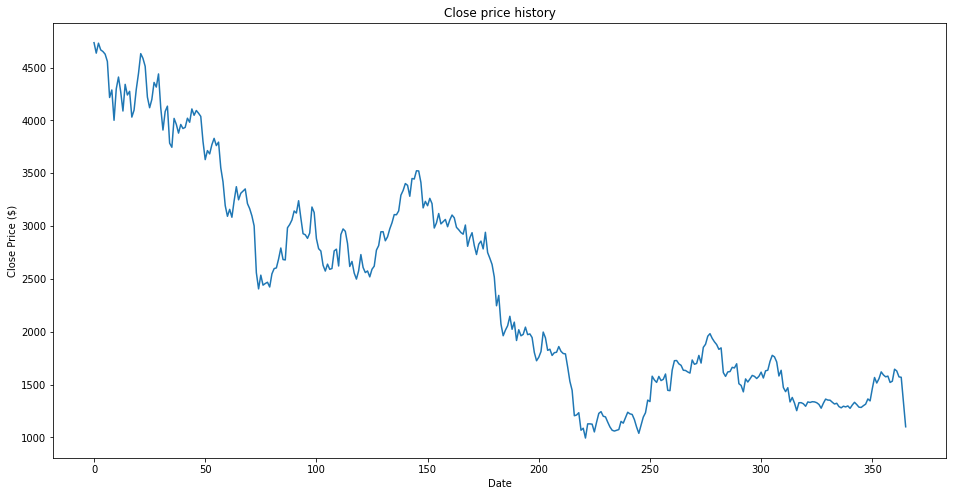

In [ ]:
plt.figure(figsize = ( 16 , 8 ))
plt.title('Close price history')
plt.plot(df['Close'].values)
plt.xlabel('Date',)
plt.ylabel('Close Price ($)')
plt.show()

In [ ]:
 df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-09,4810.071289,4837.589355,4718.039063,4735.068848,4735.068848,20834172627
1,2021-11-10,4733.362793,4859.502930,4485.093262,4636.174316,4636.174316,22748160545
2,2021-11-11,4635.453613,4778.059082,4580.990234,4730.384277,4730.384277,17933201129
3,2021-11-12,4724.306641,4808.738770,4510.920410,4667.115234,4667.115234,18316060208
4,2021-11-13,4666.719238,4702.115234,4582.180664,4651.460449,4651.460449,14457436261
...,...,...,...,...,...,...,...
361,2022-11-05,1645.156494,1660.486450,1625.964233,1627.968018,1627.968018,11006973190
362,2022-11-06,1627.901123,1634.132446,1572.234741,1572.234741,1572.234741,11632744705
363,2022-11-07,1572.016968,1604.475342,1550.415527,1568.591309,1568.591309,15279963349
364,2022-11-08,1568.329590,1574.799805,1259.443115,1332.835571,1332.835571,42048003440


In [ ]:
df.keys().tolist() == ['Open', 'High', 'Low', 'Close', 'Volume']

False

In [ ]:
df = df[['Open', 'High', 'Low', 'Close',	'Volume']]
data = df.to_numpy()
data

array([[4.81007129e+03, 4.83758936e+03, 4.71803906e+03, 4.73506885e+03,
        2.08341726e+10],
       [4.73336279e+03, 4.85950293e+03, 4.48509326e+03, 4.63617432e+03,
        2.27481605e+10],
       [4.63545361e+03, 4.77805908e+03, 4.58099023e+03, 4.73038428e+03,
        1.79332011e+10],
       ...,
       [1.57201697e+03, 1.60447534e+03, 1.55041553e+03, 1.56859131e+03,
        1.52799633e+10],
       [1.56832959e+03, 1.57479981e+03, 1.25944312e+03, 1.33283557e+03,
        4.20480034e+10],
       [1.33312244e+03, 1.33574353e+03, 1.08328564e+03, 1.10016980e+03,
        3.88644924e+10]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit_transform(data)

In [ ]:
import pickle
with open('scaler_ETH.pkl', 'wb') as f:
  pickle.dump(scaler, f)
!cp /content/scaler_ETH.pkl /content/drive/MyDrive/Project_BD

In [ ]:
X=[]
y=[]
for i in range(30,len(data)):
  X.append(data[i-30:i,:])
  y.append(data[i,:])

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
print(X.shape, y.shape)

(336, 30, 5) (336, 5)


In [ ]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(30, 5)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=False))
model.add(Dense(64,activation='tanh'))
model.add(Dense(5))

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [ ]:
model.fit(X,y,batch_size=16, epochs=100)

In [ ]:
model.save('LSTM_ETH')
!cp -r /content/LSTM_ETH /content/drive/MyDrive/Project_BD

In [ ]:
!cp -r /content/my_model /content/drive/MyDrive/Project_BD

# Đóng gói và sử dụng

In [ ]:
from tensorflow import keras
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
import pickle

class StockPredictionModel():
  def __init__(self, my_model, scaler):
    self.LSTM_model = keras.models.load_model(my_model)
    self.N = self.LSTM_model.input.shape[1]
    with open(scaler, 'rb') as f:
      self.scaler = pickle.load(f)
  def predict(self, dataFrame, numberOfDays):
    """
    dataFrame = a pandas data frame with 5 columns: Open, High,	Low,	Close and Volumns	
    """
    try:
      if dataFrame.keys().tolist() != ['Open', 'High', 'Low', 'Close', 'Volume']:
        return "Please the order of the columns's name"
    except:
      return False
    data = dataFrame.to_numpy()
    data = self.scaler.transform(data)
    y = []
    for _ in range(numberOfDays):
      data = data[len(data)-30:,:]
      result = self.LSTM_model.predict(np.array([data]))
      data = np.concatenate((data, result), axis=0)
      y.append(result.tolist()[0])
    result = self.scaler.inverse_transform(np.array(y))
    result = pd.DataFrame(np.array(result), columns =['Open', 'High', 'Low', 'Close', 'Volume'])
    return result

In [ ]:
DogeModel = StockPredictionModel('LSTM_Doge','scaler_Doge.pkl')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project_BD/Dataset/DOGE-USD.csv")
df = df[['Open', 'High', 'Low', 'Close',	'Volume']]

In [ ]:
df.iloc[-30:,:]

,Open,High,Low,Close,Volume
336,0.059508,0.060653,0.057887,0.060258,295967661
337,0.060259,0.060866,0.059540,0.059881,199133108
338,0.059871,0.060159,0.055741,0.059674,466439562
339,0.059666,0.060943,0.058315,0.058643,242691429
340,0.058638,0.059567,0.058146,0.058580,182208164
341,0.058583,0.059415,0.058583,0.058914,162246280
342,0.058913,0.060057,0.058625,0.059935,174261450
343,0.059935,0.060773,0.058752,0.059776,239236218
344,0.059779,0.060680,0.058628,0.058713,287297160
345,0.058711,0.060237,0.058449,0.059536,241388629


In [ ]:
prediction = DogeModel.predict(df, 30)

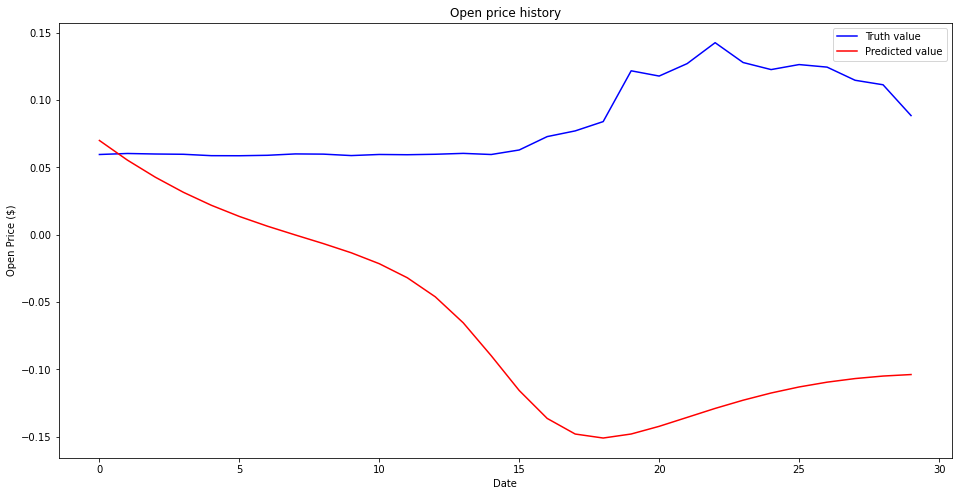

In [ ]:
plt.figure(figsize = ( 16 , 8 ))
plt.title('Open price history')
plt.plot(df['Open'].values[-30:], color='blue', label='Truth value')
plt.plot(prediction['Open'].values[-30:], color='red')
plt.legend(['Truth value', 'Predicted value'])
plt.xlabel('Date',)
plt.ylabel('Open Price ($)')
plt.show()